<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/ex0613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# セッション5実践編： エラー/エラーメッセージ


In [1]:
library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




xとyを足して24という値を求めたい：


In [2]:
x <- 10
y <- 14
x + y

[1] 24

1+2を足して、3+4で割りたい：


In [3]:
((1+2)/(3+4))

[1] 0.4285714

残りの問題では、mtcarsデータセットを使用する：



In [4]:
data(mtcars)


1,2,・・・,L-1という数字のベクトルを変数 x に保存したい。ここで、Lは mtcars の列の数である。


In [5]:
L <- ncol(mtcars)
x <- 1:(L-1)

In [7]:
x
mtcars %>% head

[1]  1  2  3  4  5  6  7  8  9 10

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [10]:
dim(mtcars)
colnames(mtcars)
length(colnames(mtcars))

[1] 32 11

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

[1] 11

mpgとwtの散布図を作りたい：


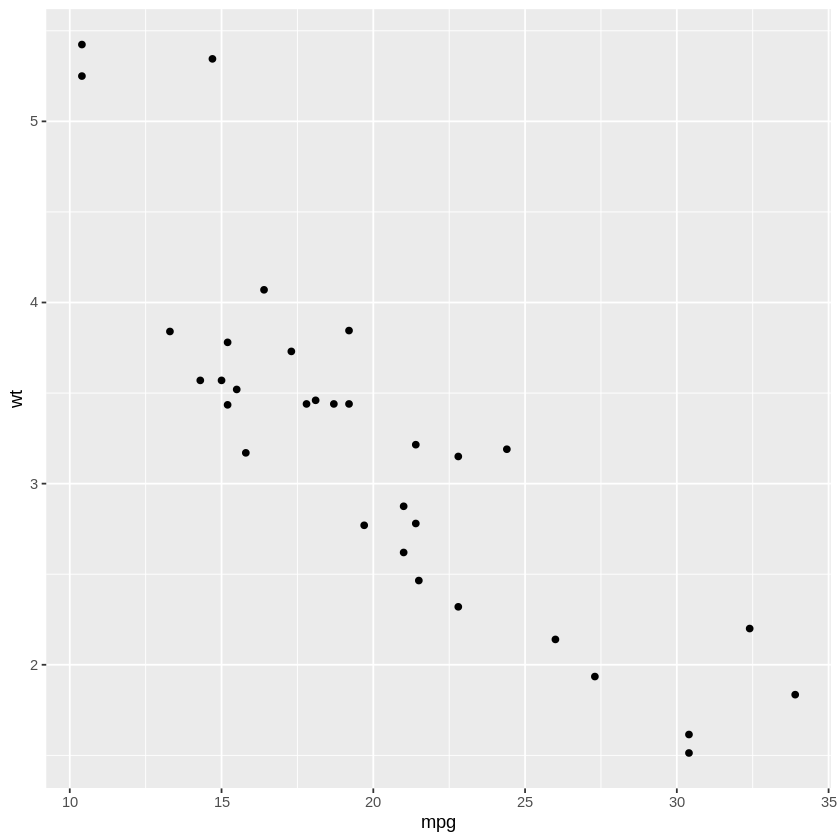

In [11]:
mtcars %>% ggplot(aes(mpg, wt)) + geom_point()

mpgのヒストグラムを作りたい：


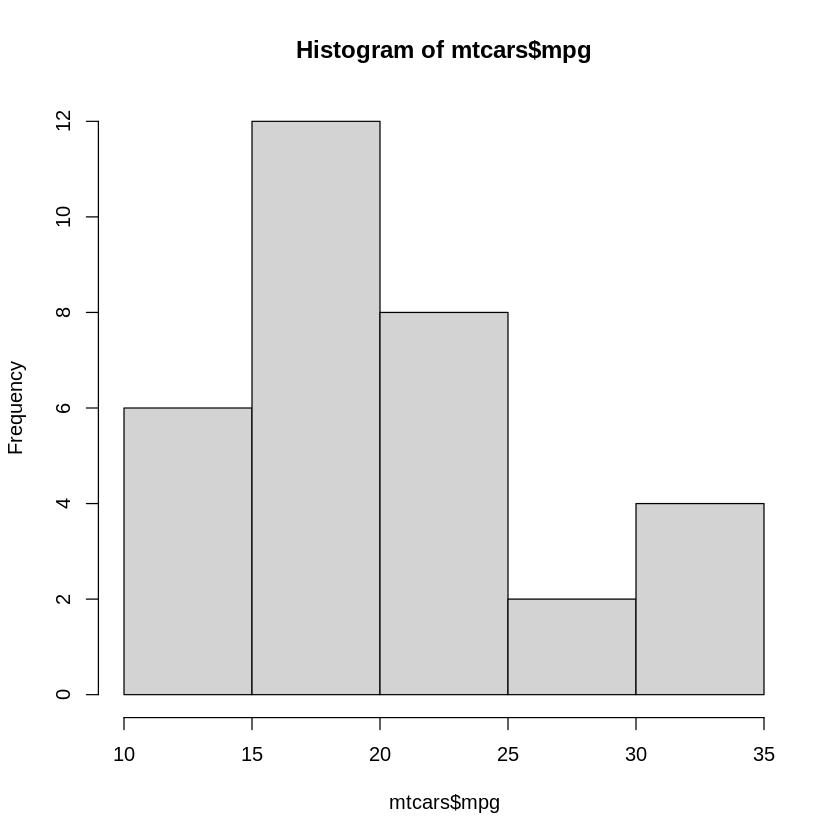

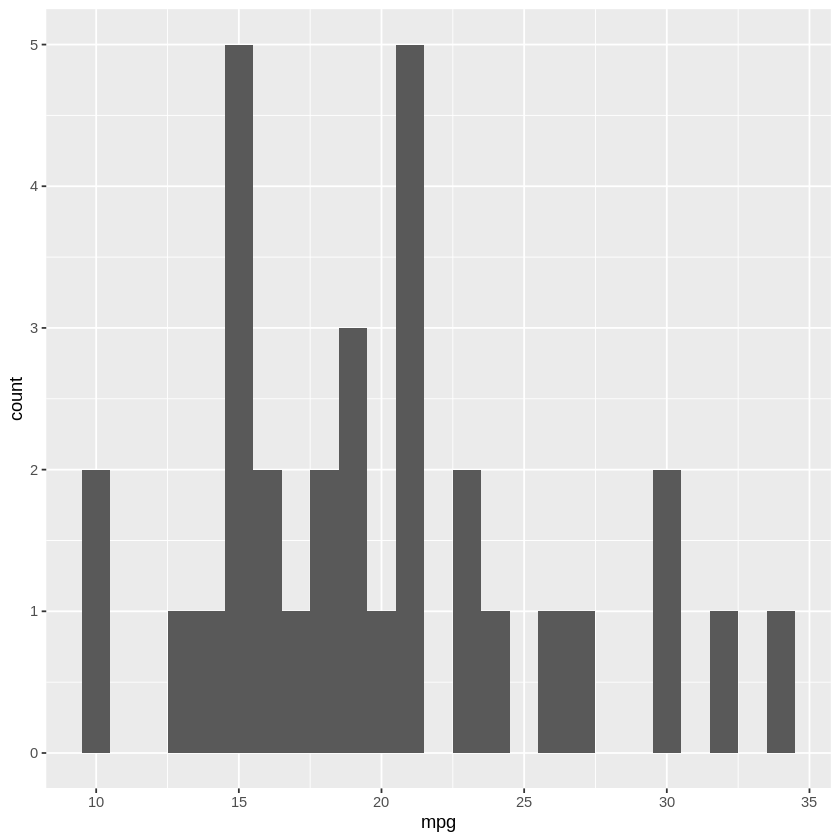

In [18]:
hist(mtcars$mpg)
mtcars %>% ggplot(aes(mpg)) +geom_histogram(binwidth = 1)

cylの各値に対してmpgのboxplotを作成し、ポイントでオーバーレイし、プロットにタイトルを付けたい：


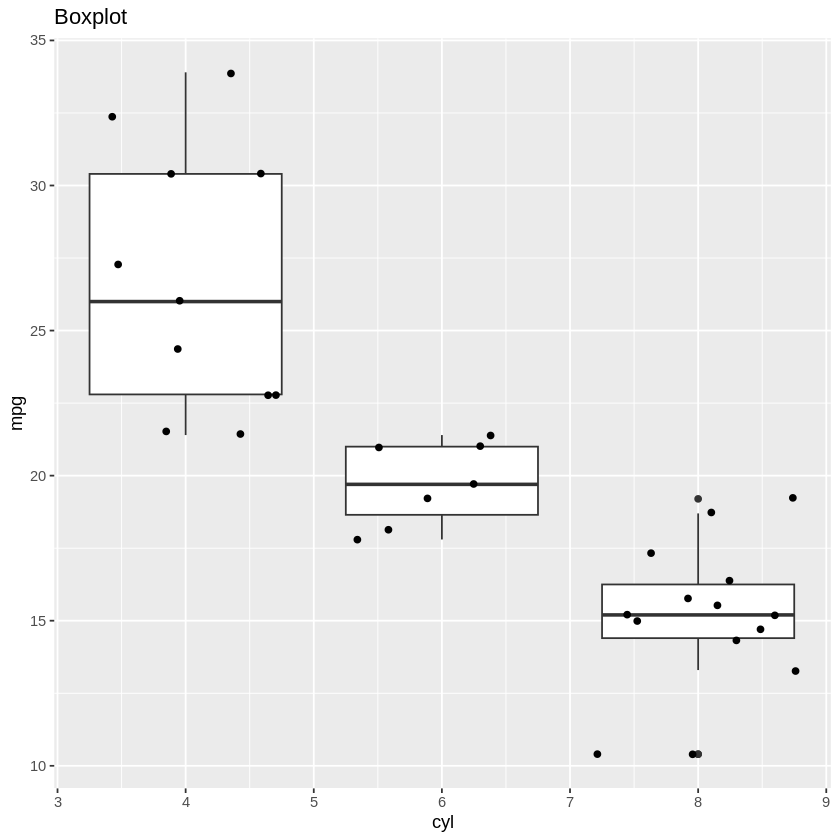

In [24]:
mtcars %>% ggplot(aes(x=cyl, y=mpg, group=cyl)) + geom_boxplot() + geom_point(position="jitter") +
  labs(title = "Boxplot")

qsec vs. wt の散布図が欲しいが、すべての点を青く着色したい：


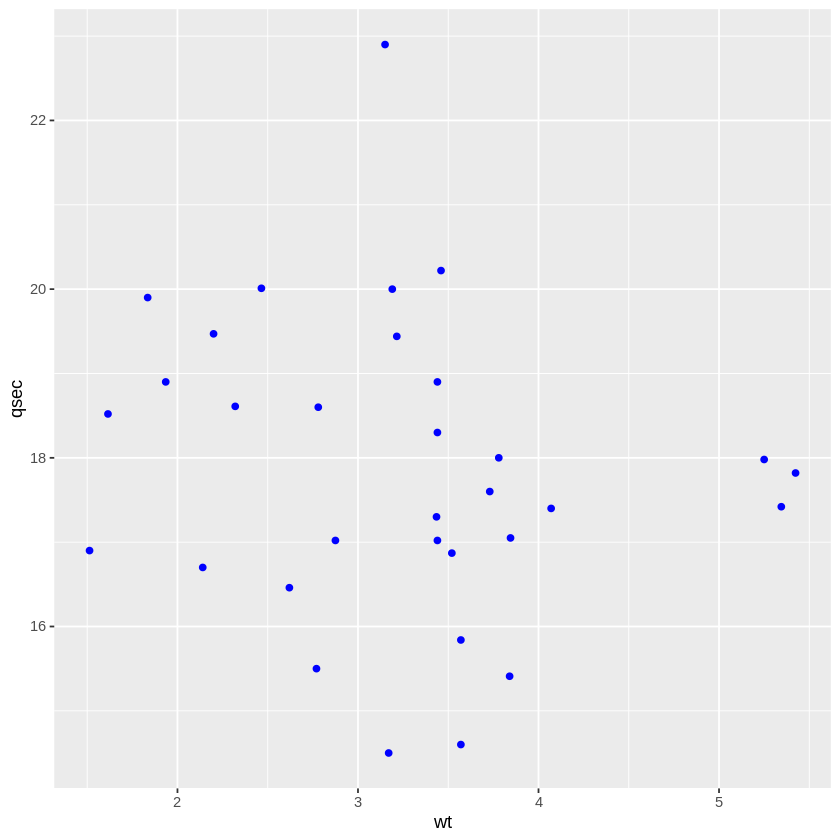

In [25]:
mtcars %>% ggplot(aes(wt, qsec)) + geom_point(col="blue")

miles per quartという新しい列を作成し、最初の3行を表示したい：


In [28]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [39]:
mtcars %>% mutate(`miles per quart` = mpg / 4) %>% head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,miles per quart
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,5.25
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,5.25
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,5.70


In [30]:
mmm <- mtcars %>% mutate(`miles per quart` = mpg / 4)

In [31]:
mmm$`miles per quart`

[1] 5.250 5.250 5.700 5.350 4.675 4.525 3.575 6.100 5.700 4.800 4.450 4.100
[13] 4.325 3.800 2.600 2.600 3.675 8.100 7.600 8.475 5.375 3.875 3.800 3.325
[25] 4.800 6.825 6.500 7.600 3.950 4.925 3.750 5.350

gear の各値の平均値mpgを計算したい：


In [32]:
mtcars %>% group_by(gear) %>% summarise(mean(mpg))

gear,mean(mpg)
<dbl>,<dbl>
3,16.10667
4,24.53333
5,21.38000


データセット中の最大値であるhpとdispを計算したい：

In [33]:
max(mtcars$hp)

[1] 335

In [34]:
max(mtcars$disp)

[1] 472

In [38]:
mtcars %>% summarize(max = max(hp, disp))
mtcars %>% select(hp, disp) %>% summarize_all(max)

max
<dbl>
472


hp,disp
<dbl>,<dbl>
335,472
